<a href="https://colab.research.google.com/github/FairozAhmadSheikh/Tensor_Flow/blob/main/03_introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-09-10 02:53:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   201MB/s    in 0.5s    

2025-09-10 02:53:06 (201 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train

pizza  steak


In [6]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [7]:
import os

In [8]:
#walkthrough diretory and and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directtories and {len(filenames)} images in '{dirpath}'.")

There are 2 directtories and 0 images in 'pizza_steak'.
There are 2 directtories and 0 images in 'pizza_steak/test'.
There are 0 directtories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directtories and 250 images in 'pizza_steak/test/steak'.
There are 2 directtories and 0 images in 'pizza_steak/train'.
There are 0 directtories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directtories and 750 images in 'pizza_steak/train/steak'.


In [9]:
# Lets now visualize images but before that lets get the class_names programatically
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Lets now visualize images

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [11]:
def view_random_image(target_dir,target_class):
    # Setup target directory
    target_folder=target_dir+target_class
    # get a random image for directory
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    # read the image and plot it
    img=mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)
    print(f'Image shape : {img.shape}')


['885571.jpg']
Image shape : (512, 512, 3)


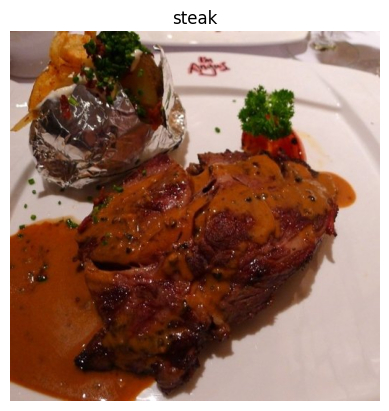

In [12]:
view_random_image(target_dir='pizza_steak/train/',target_class='steak')

**Other way for writing this function can be as shown below**

In [13]:
def plot_random_images(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.choice(os.listdir(target_folder))
    print(random_image)

    # Read and load our image
    image=mpimg.imread(target_folder+"/"+random_image)
    print(f'Image Shape {image.shape}')
    plt.imshow(image)
    plt.title(target_class)
    plt.axis('off')
    return image

3314535.jpg
Image Shape (289, 512, 3)


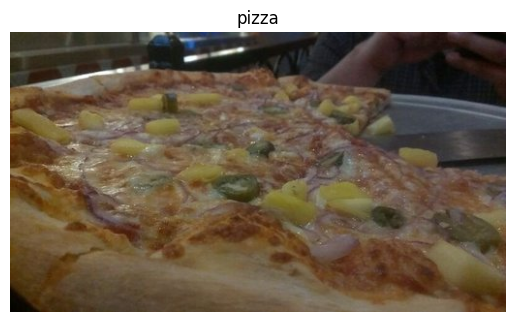

In [14]:
img=plot_random_images('pizza_steak/train/','pizza')

In [15]:
print(img)

[[[ 54  51  32]
  [ 57  54  35]
  [ 59  57  36]
  ...
  [ 27  17  15]
  [ 32  22  20]
  [ 34  24  22]]

 [[ 59  56  37]
  [ 61  58  39]
  [ 62  60  39]
  ...
  [ 20  12   9]
  [ 23  15  12]
  [ 25  17  14]]

 [[ 58  55  36]
  [ 59  56  37]
  [ 61  58  39]
  ...
  [ 11   8   3]
  [ 13  10   5]
  [ 14  11   6]]

 ...

 [[  8   4   3]
  [  6   2   1]
  [  6   2   0]
  ...
  [ 95  65  31]
  [ 94  64  30]
  [ 92  63  29]]

 [[  8   4   3]
  [  4   3   1]
  [  6   2   0]
  ...
  [ 98  68  34]
  [ 92  63  29]
  [ 89  60  26]]

 [[  6   5   3]
  [  4   4   2]
  [  4   3   1]
  ...
  [ 99  69  35]
  [101  72  40]
  [ 86  60  27]]]


In [16]:
import tensorflow as tf

In [17]:
tf.constant(img)

<tf.Tensor: shape=(289, 512, 3), dtype=uint8, numpy=
array([[[ 54,  51,  32],
        [ 57,  54,  35],
        [ 59,  57,  36],
        ...,
        [ 27,  17,  15],
        [ 32,  22,  20],
        [ 34,  24,  22]],

       [[ 59,  56,  37],
        [ 61,  58,  39],
        [ 62,  60,  39],
        ...,
        [ 20,  12,   9],
        [ 23,  15,  12],
        [ 25,  17,  14]],

       [[ 58,  55,  36],
        [ 59,  56,  37],
        [ 61,  58,  39],
        ...,
        [ 11,   8,   3],
        [ 13,  10,   5],
        [ 14,  11,   6]],

       ...,

       [[  8,   4,   3],
        [  6,   2,   1],
        [  6,   2,   0],
        ...,
        [ 95,  65,  31],
        [ 94,  64,  30],
        [ 92,  63,  29]],

       [[  8,   4,   3],
        [  4,   3,   1],
        [  6,   2,   0],
        ...,
        [ 98,  68,  34],
        [ 92,  63,  29],
        [ 89,  60,  26]],

       [[  6,   5,   3],
        [  4,   4,   2],
        [  4,   3,   1],
        ...,
        [ 99,  69,  3

Lets see what shape image is

In [18]:
img.shape

(289, 512, 3)

💚 Neural Networks love normalized or scaled data so lets do it

In [19]:
img/255.0  # This normalizes pixel values for a single image

array([[[0.21176471, 0.2       , 0.1254902 ],
        [0.22352941, 0.21176471, 0.1372549 ],
        [0.23137255, 0.22352941, 0.14117647],
        ...,
        [0.10588235, 0.06666667, 0.05882353],
        [0.1254902 , 0.08627451, 0.07843137],
        [0.13333333, 0.09411765, 0.08627451]],

       [[0.23137255, 0.21960784, 0.14509804],
        [0.23921569, 0.22745098, 0.15294118],
        [0.24313725, 0.23529412, 0.15294118],
        ...,
        [0.07843137, 0.04705882, 0.03529412],
        [0.09019608, 0.05882353, 0.04705882],
        [0.09803922, 0.06666667, 0.05490196]],

       [[0.22745098, 0.21568627, 0.14117647],
        [0.23137255, 0.21960784, 0.14509804],
        [0.23921569, 0.22745098, 0.15294118],
        ...,
        [0.04313725, 0.03137255, 0.01176471],
        [0.05098039, 0.03921569, 0.01960784],
        [0.05490196, 0.04313725, 0.02352941]],

       ...,

       [[0.03137255, 0.01568627, 0.01176471],
        [0.02352941, 0.00784314, 0.00392157],
        [0.02352941, 0

# **Lets Start creating end to end**
* From Begining

In [20]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zipfile_ref=zipfile.ZipFile('pizza_steak.zip')
zipfile_ref.extractall()
zipfile_ref.close()

--2025-09-10 02:53:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   263MB/s    in 0.4s    

2025-09-10 02:53:16 (263 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen=ImageDataGenerator(rescale=1.0/255)
valid_datagen=ImageDataGenerator(rescale=1.0/255)

In [23]:
train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

In [24]:
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='binary',batch_size=32)
valid_data=valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# **Model Creation Starts**

In [25]:
tf.random.set_seed(42)

model1=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [26]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [27]:
history1=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.6131 - loss: 0.6741 - val_accuracy: 0.6900 - val_loss: 0.5399
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7732 - loss: 0.4749 - val_accuracy: 0.8480 - val_loss: 0.3841
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.8406 - loss: 0.3928 - val_accuracy: 0.8520 - val_loss: 0.3447
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.9025 - loss: 0.2853 - val_accuracy: 0.8620 - val_loss: 0.3578
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.9373 - loss: 0.1978 - val_accuracy: 0.8480 - val_loss: 0.3837


In [28]:
import matplotlib.pyplot as plt
import pandas as pd

<Axes: >

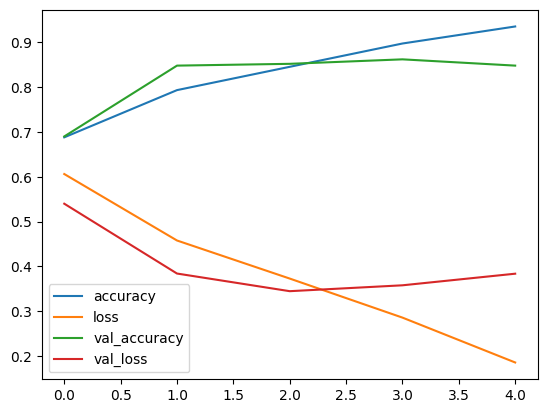

In [29]:
pd.DataFrame(history1.history).plot()

Lets now try to fit it on they [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.69543&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) Model Non CNN model on image data

In [31]:
tf.random.set_seed(42)
model2=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
history2=model2.fit(train_data,validation_data=valid_data,epochs=5,steps_per_epoch=len(train_data),validation_steps=len(valid_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.5237 - loss: 1.0950 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.4873 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.4967 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.4826 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.4921 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932


In [32]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

# **Lets Now Improve our Model Non CNN Model**

In [34]:
tf.random.set_seed(42)
model_3=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_3.fit(train_data,validation_data=valid_data,epochs=5,steps_per_epoch=len(train_data),validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.5173 - loss: 7.0083 - val_accuracy: 0.5580 - val_loss: 1.5973
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.6579 - loss: 1.1073 - val_accuracy: 0.7320 - val_loss: 0.5374
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.7141 - loss: 0.9138 - val_accuracy: 0.7800 - val_loss: 0.5274
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7514 - loss: 0.6598 - val_accuracy: 0.7220 - val_loss: 0.6006
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.7872 - loss: 0.4798 - val_accuracy: 0.5440 - val_loss: 0.9836
